In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def derivative(a: float, b: float, func: callable, epsilon: float = 0.0001):
    X = np.linspace(a, b, int(np.ceil((b - a) / epsilon)))
    return (func(X + epsilon) - func(X - epsilon)) / (2 * epsilon)

In [3]:
def n_derivative(n: int, a: float, b: float, func: callable, epsilon: float = 0.0001):
    curr = derivative(a - (n - 1) * epsilon, b + epsilon * (n - 1), func, epsilon)

    for _ in range(1, n):
        new = np.array([curr[i + 1] - curr[i - 1] for i in range(1, len(curr) - 1)])
        new /= 2 * epsilon
        curr = new

    return curr

In [4]:
def taylor_exp(
    x0: float, f_x0: float, df_x0: float, df2_x0: float, a: float, b: float, h: float
):
    X = np.linspace(a, b, int(np.ceil((b - a) / h)))
    res = df_x0 * (X - x0)
    res+= (df2_x0 * ((X - x0) ** 2)) / 2
    res += f_x0

    return res



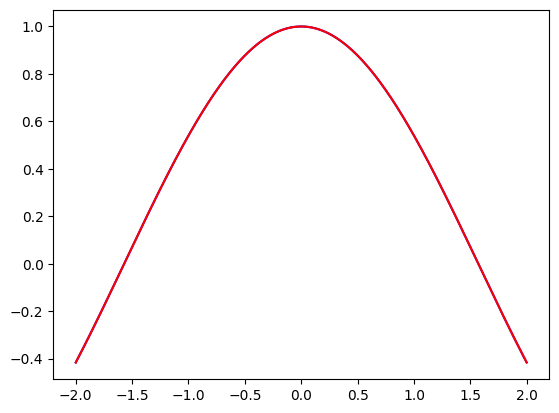

In [17]:
X = np.linspace(-2, 2, 40000)

plt.plot(X, np.cos(X), color = 'blue')
plt.plot(X, derivative(-2, 2, np.sin), color = 'red')

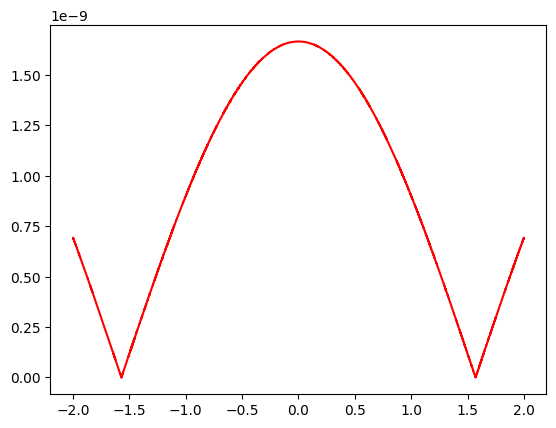

In [18]:
plt.plot(X, np.abs(derivative(-2, 2, np.sin) - np.cos(X)), color = 'red')

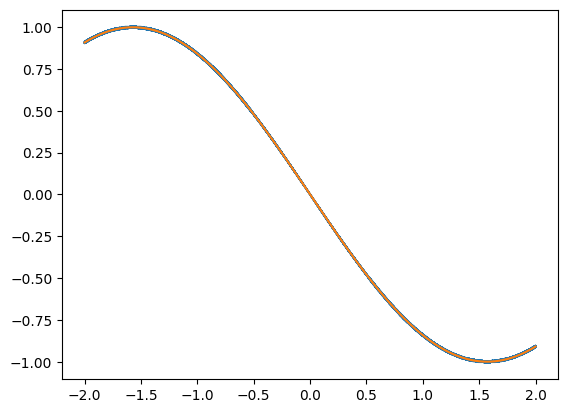

In [20]:
X = np.linspace(-2, 2, int((2 - (-2)) / 1e-7))
plt.plot(X, n_derivative(2, -2, 2, np.sin, 1e-7))
plt.plot(X, -np.sin(X))

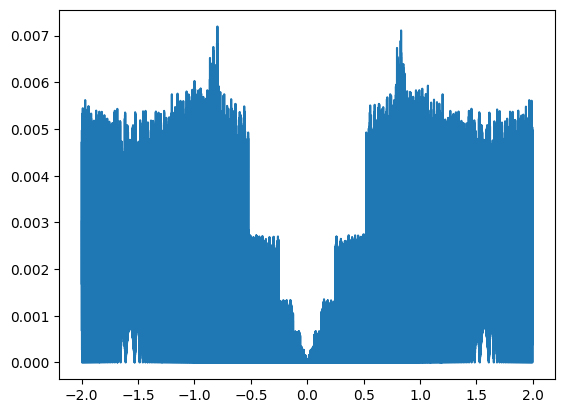

In [21]:
plt.plot(X, np.abs(n_derivative(2, -2, 2, np.sin, 1e-7) + np.sin(X)))

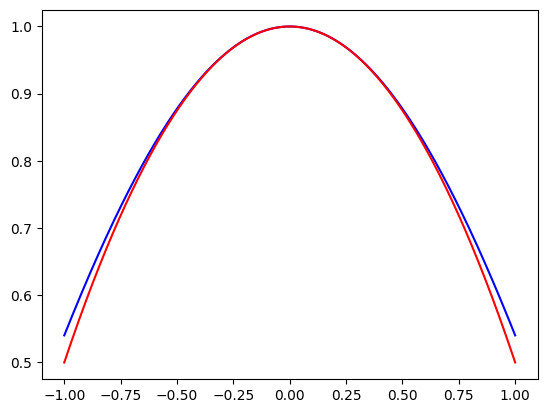

In [13]:
X = np.linspace(-1, 1, 20000000)

plt.plot(X, np.cos(X), color = 'blue')
plt.plot(X, taylor_exp(0, 1, 0, -1, -1, 1, 1e-7), color = 'red')

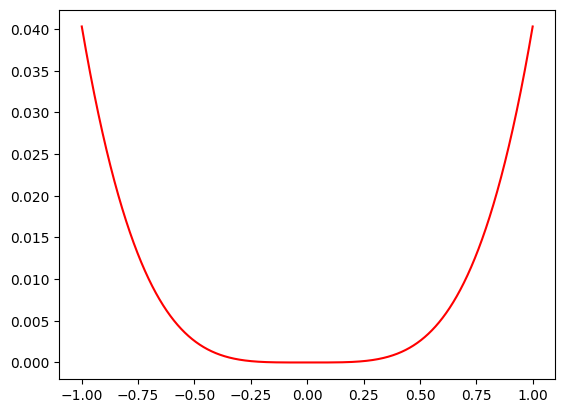

In [14]:
X = np.linspace(-1, 1, 20000000)
plt.plot(X, np.abs(taylor_exp(0, 1, 0, -1, -1, 1, 1e-7) - np.cos(X)), color = 'red')